In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel("Vegetables price predict.xlsx")
pd.set_option("display.max_columns",None)
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [9]:
x = df["Weight"]
y = df["Price"]

In [19]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [21]:
mean_x

4.571428571428571

In [23]:
mean_y

47.142857142857146

In [15]:
dev_x = x-mean_x
dev_y = y-mean_y

In [33]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [35]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [37]:
m = np.sum(dev_x * dev_y)/np.sum(dev_x**2)
m

2.620967741935484

In [39]:
#interception
c = mean_y - (m * mean_x)
c

35.16129032258065

In [41]:
price_predict = (m*6.5)+c
price_predict

52.197580645161295

# with Sklearn

In [44]:
from sklearn.linear_model import LinearRegression 

In [46]:
reg = LinearRegression() 

In [48]:
reg.fit(df[["Weight"]],df[["Price"]])

LinearRegression()

In [54]:
reg.coef_

array([[2.62096774]])

In [56]:
reg.intercept_

array([35.16129032])

In [58]:
df2 = df.copy()
df2

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [64]:
df2["Predicted_price"] = reg.predict(df[["Weight"]]) 
df2

,Weight,Price,Predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [76]:
df2["residuals"] = df2["Price"] - df2["Predicted_price"]
df2

,Weight,Price,Predicted_price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [82]:
reg.score(df[["Weight"]],df[["Price"]])

0.09412315095348434

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [98]:
mse = mean_squared_error(df2[["Predicted_price"]],df2[["Price"]])
mse

167.30990783410135

In [100]:
mae = mean_absolute_error(df2[["Predicted_price"]],df2[["Price"]])
mae

9.87327188940092

In [102]:
import matplotlib.pyplot as plt

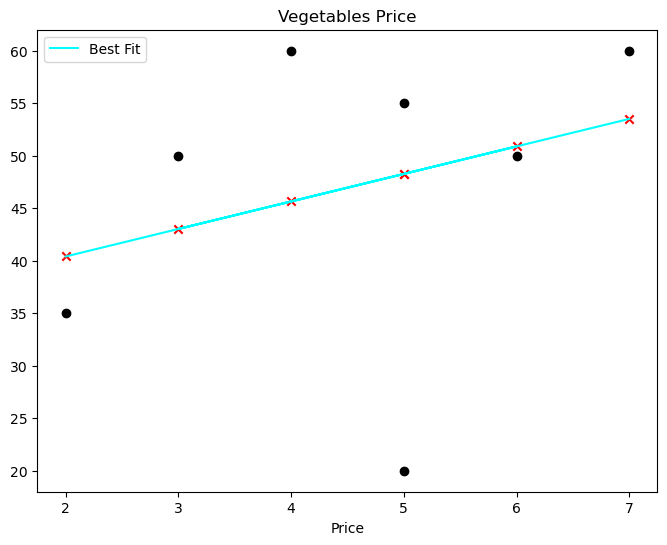

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(df["Weight"],df["Price"],color="black",marker="o")
plt.plot(df["Weight"],df2["Predicted_price"],label="Best Fit",color="cyan")
plt.scatter(df["Weight"],df2["Predicted_price"],marker="x",color="red")
plt.xlabel("Weight")
plt.xlabel("Price")
plt.title("Vegetables Price")
plt.legend()
plt.show()